# Regression Based Analysis: Sephora product - what makes a liked product?

### I.	Framing the problem

In a Retail Business, one of the most important question a Manager needs to formulate and find a solution to is "How much demand will a particular product generate, and how can I propose a sufficient amount of this product to consumers in order to maximize profits, while minimizing over-stocking?".

Working with a dataset from Sephora can be beneficial for a Product Manager in order to make better decisions regarding stock availability based on demand. The aim of this experiment is to  provide valuable insights into consumer behavior, such as which products are popular and in high demand, as well as identifying trends and patterns in purchasing habits. This information can be used to optimize stock levels and ensure that products are available when customers want to purchase them, reducing the likelihood of stockouts and lost sales. Additionally, understanding consumer preferences and purchase history can aid in product development and marketing strategies.

Therefore, the following notebook will aim to produce a model that should predict wether a product will produce high demand based on its attributes. We will be using Python (version 3.9) to formulate a regression based supervised model.

We will be mesuring how much a product is appreciated by customers using the metric "rating", displaying the mean number rating given to this product by customers. High ratings mean that customers loved this product, and are more likely to buy it again, recommend it to a friend, or that the rating itself will attract many new customers.

### II.	Data Acquisition

Our dataset has been obtained from the following Kaggle link: 
https://www.kaggle.com/datasets/raghadalharbi/all-products-available-on-sephora-website

The data dictionary is provided there, explaining the meaning of each of the columns name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unidecode
import seaborn as sns

In [2]:
# read xls file
df = pd.read_csv("sephora_website_dataset.csv")

### III.	Data Exploration

The purpose of this data exploration is to have a better sense of the data we will be working on. 

##### Display the first 5 rows of data

In [3]:
df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


##### Display the shape of the data (number of rows, number of columns)

In [4]:
df.shape

(9168, 21)

##### Display the names of each column

In [5]:
df.columns

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [6]:
df["rating"].unique()

array([4. , 4.5, 3.5, 5. , 3. , 0. , 2.5, 2. , 1. , 1.5])

##### Display the summary statistics of the numerical columns

In [7]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


 ### IV.   Data Preparation

##### Deleting unecessary attributes:

Reasons for droping the below variables:

* ID: unecessary for obvious reasons. The ID of a product is an internal identification of the product and will not help predict its rating
* Size: The column contains information with a mix of characters. It could be intersting to only keep the number before the unit ml (idea for futur investigations)
* Name: same reason as ID
* Gives infromation VERY similar to 'price' variable, thus creating collinearity, which will be bad for our model.
* URL: same reason as ID
* MarketingFlags_content: Internal information, not available to users and thus not intersting as a predictor
* Options: hard to decript, and same reason as Size
* How to use: Text analysis, intersting for further investigation
* Ingredients: Text analysis, intersting for further investigation

In [8]:
df = df.drop(columns=["id", "size", "name", "value_price", "URL", "MarketingFlags_content", "options", "details", "how_to_use", "ingredients"])

##### Dummifying the MarketingFlags variable

In [9]:
dummy_df = pd.get_dummies(df['MarketingFlags'],prefix='MarketingFlags')
df = pd.concat([df, dummy_df], axis=1)
df = df.drop(columns=['MarketingFlags'])

##### Having a look at catgeories...

In [10]:
counts = df['category'].value_counts()
print(counts.head(20))

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
Face Masks                   230
Rollerballs & Travel Size    228
Hair Styling Products        224
Eye Palettes                 202
Lipstick                     191
Eye Creams & Treatments      191
Shampoo                      186
Face Brushes                 183
Highlighter                  169
Foundation                   163
Cologne                      158
Mini Size                    154
Mascara                      154
Conditioner                  147
Candles & Home Scents        144
Name: category, dtype: int64


##### Deleting any observation with a category value that only appears up to 15 times:

In [11]:
# Get the categories that appear only up to 15 times
categories_to_remove = df['category'].value_counts()[df['category'].value_counts() <= 15].index

# Delete observations with a unique category value
df = df[~df['category'].isin(categories_to_remove)]

##### Having a look at brands...

In [12]:
counts2 = df['brand'].value_counts()
print(counts2.head(20))

SEPHORA COLLECTION         448
CLINIQUE                   220
tarte                      168
TOM FORD                   156
Dior                       140
Fresh                      137
Lancôme                    117
Kiehl's Since 1851         116
Bumble and bumble          102
Moroccanoil                 96
Kérastase                   96
Shiseido                    93
MAKE UP FOR EVER            92
Benefit Cosmetics           91
philosophy                  84
FENTY BEAUTY by Rihanna     82
Too Faced                   80
Yves Saint Laurent          77
Givenchy                    76
Living Proof                74
Name: brand, dtype: int64


##### Deleting any observation with a brand value that only appears up to 15 times:

In [13]:
# Get the brands that appear only up to 15 times
brands_to_remove = df['brand'].value_counts()[df['brand'].value_counts() <= 15].index

# Delete observations with a unique category value
df = df[~df['brand'].isin(brands_to_remove)]

In [14]:
df.shape

(7803, 12)

We can see that more than 1,000 observations were discarded from our dataset.

##### Identifying outliers and deleting them:

In [15]:
# Get the z-scores for each column
z = np.abs(df - df.mean()) / df.std()

# Identify outliers (rows with a z-score greater than 3)
outliers = z[z > 3]

# Get the indices of the outlier rows
outlier_indices = outliers.dropna(thresh=1).index

# Delete the outlier rows
df = df.drop(outlier_indices)

/var/folders/n8/y2cbsyh175j4_zxb8gqgkd6w0000gn/T/ipykernel_19752/923032887.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs(df - df.mean()) / df.std()
/var/folders/n8/y2cbsyh175j4_zxb8gqgkd6w0000gn/T/ipykernel_19752/923032887.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = np.abs(df - df.mean()) / df.std()


In [16]:
df.shape

(6488, 12)

Here again, around 1,300 observations were droped.

In [17]:
df.nunique()

brand                    167
category                 100
rating                     9
number_of_reviews        782
love                    1235
price                    222
online_only                2
exclusive                  2
limited_edition            1
limited_time_offer         1
MarketingFlags_False       2
MarketingFlags_True        2
dtype: int64

##### Deleting limited_edition and limited_time_offer

In [18]:
df = df.drop(columns=["limited_edition", "limited_time_offer"])

##### Pre-processing the data 

In [19]:
# Lowercase all the text
df = df.apply(lambda x: x.astype(str).str.lower())

# Remove non-alphanumeric characters
df = df.apply(lambda x: x.astype(str).apply(lambda x: re.sub(r'[^\w\s]','',x)))

# Replace whitespaces and line breaks with a single space
df = df.apply(lambda x: x.astype(str).apply(lambda x: re.sub(r'[\n\r\t]',' ',x)))

# Remove unknown characters
df = df.apply(lambda x: x.astype(str).apply(lambda x: unidecode.unidecode(x)))

#### Creating a test set

In [20]:
def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

5191

In [22]:
len(test_set)

1297

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [23]:
np.random.seed(42) 

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

##### Rating visualization

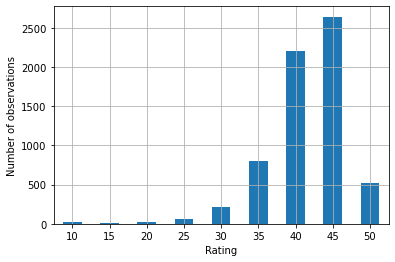

In [25]:
df["rating"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Rating")
plt.ylabel("Number of observations")
plt.show()

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["rating"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [27]:
strat_train_set, strat_test_set = strat_splits[0]

In [28]:
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["rating"], random_state=42)

In [29]:
strat_test_set["rating"].value_counts() / len(strat_test_set)

45    0.407550
40    0.340524
35    0.122496
50    0.080123
30    0.032357
25    0.009245
20    0.003852
10    0.003082
15    0.000770
Name: rating, dtype: float64

In [30]:
# extra code – computes the data for Figure 2–10

def rating_proportions(data):
    return data["rating"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": rating_proportions(df),
    "Stratified %": rating_proportions(strat_test_set),
    "Random %": rating_proportions(test_set),
}).sort_index()
compare_props.index.name = "Rating Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Rating Category,,,,,
10,0.29,0.31,0.23,5.23,-21.08
15,0.09,0.08,0.15,-16.69,66.62
20,0.37,0.39,0.54,4.13,45.79
25,0.94,0.92,1.16,-1.67,22.91
30,3.24,3.24,3.16,-0.03,-2.41
35,12.27,12.25,11.56,-0.16,-5.81
40,34.03,34.05,33.28,0.06,-2.20
45,40.74,40.76,41.76,0.04,2.50
50,8.03,8.01,8.17,-0.22,1.70


#### Discover and Visualize the Data to Gain Insights

In [31]:
df = strat_train_set.copy()

#### Visualizing the rating - price relationship

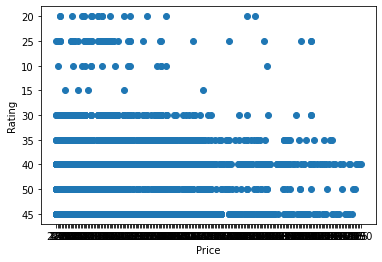

In [32]:
plt.scatter(df['price'], df['rating'])

# Sorting values by rating
df = df.sort_values(by='rating')

# Label the x and y axes
plt.xlabel('Price')
plt.ylabel('Rating')

# Show the plot
plt.show()

The highest ranked products seem to be distributed evenly in terms of price, with a small preference for products with a lower price. In rating 5.0, cheaper products are more appreciated than expencive ones.

### V. Select and Train a Model

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

#### Variables

In [34]:
# Define the independent variables
independent_variables = ['number_of_reviews', 'love', 'price', 'online_only', 'exclusive', 'MarketingFlags_False', 'MarketingFlags_True']

# Define the categorical variables
categorical_vars = ['brand','category']

# Use one-hot encoding on categorical variables
df = pd.get_dummies(df, columns=categorical_vars)

#### Create the regression model and scale the data

We have decided to use a Linear Regression Model

In [35]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

#### Fit & Predict

In [36]:
X = df[independent_variables + list(df.columns[df.columns.str.startswith(categorical_vars[0])]) + list(df.columns[df.columns.str.startswith(categorical_vars[1])])]
y = df['rating']

#### Feature Selection: Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier on your training data
clf.fit(X_train, y_train)

# Create a new selector object and pass the trained classifier to it
# "prefit=True" is used to tell the model that the classifier is already fitted
sfm = SelectFromModel(clf, threshold=0.25, prefit=True)

# Apply the selector to the training data
X_important_train = sfm.transform(X_train)

# Apply the selector to the test data
X_important_test = sfm.transform(X_test)

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warn(


#### Visualize important features:

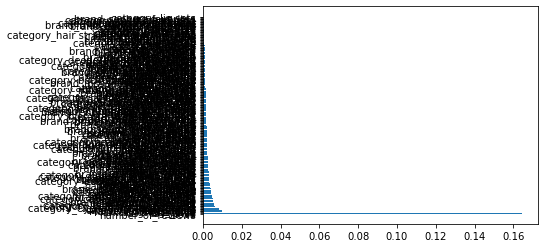

In [38]:
import matplotlib.pyplot as plt

# Get feature importances from the classifier
importances = clf.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = importances.argsort()[::-1]

# Get the feature names from X_train
feature_names = X_train.columns

# Create plot
plt.barh(range(X_train.shape[1]), importances[sorted_index])
plt.yticks(range(X_train.shape[1]), feature_names[sorted_index])

# Show plot
plt.show()

In [39]:
# Get the index of importances from greatest importance to least
sorted_index = importances.argsort()[::-1]

# Get the feature names from X_train
feature_names = X_train.columns

# Print the 10 most important features
print(feature_names[sorted_index][:100])

Index(['number_of_reviews', 'love', 'price', 'exclusive', 'online_only',
       'MarketingFlags_True', 'MarketingFlags_False', 'category_moisturizers',
       'brand_clinique', 'category_eye creams  treatments',
       'category_face serums', 'brand_tarte', 'category_perfume',
       'category_hair styling products', 'category_face wash  cleansers',
       'category_mascara', 'brand_dior', 'category_face masks',
       'brand_sephora collection', 'category_cologne', 'category_shampoo',
       'category_foundation', 'category_rollerballs  travel size',
       'category_face brushes', 'brand_shiseido', 'brand_kiehls since 1851',
       'brand_fresh', 'category_setting spray  powder', 'category_conditioner',
       'brand_lancome', 'category_face primer', 'category_mini size',
       'category_eyeliner', 'category_value  gift sets',
       'category_highlighter', 'category_face sunscreen', 'brand_milk makeup',
       'brand_bumble and bumble', 'category_lipstick', 'brand_tom ford',
      

#### Now repeat the same process, only keeping the first 50 most important features (displayed above)

In [40]:
Independent_vars_2 = ['number_of_reviews', 'love', 'price', 'exclusive', 'online_only',
       'MarketingFlags_True', 'MarketingFlags_False', 'category_moisturizers',
       'brand_clinique', 'category_eye creams  treatments',
       'category_face serums', 'brand_tarte', 'category_perfume',
       'category_hair styling products', 'category_face wash  cleansers',
       'category_mascara', 'brand_dior', 'category_face masks',
       'brand_sephora collection', 'category_cologne', 'category_shampoo',
       'category_foundation', 'category_rollerballs  travel size',
       'category_face brushes', 'brand_shiseido', 'brand_kiehls since 1851',
       'brand_fresh', 'category_setting spray  powder', 'category_conditioner',
       'brand_lancome', 'category_face primer', 'category_mini size',
       'category_eyeliner', 'category_value  gift sets',
       'category_highlighter', 'category_face sunscreen', 'brand_milk makeup',
       'brand_bumble and bumble', 'category_lipstick', 'brand_tom ford',
       'brand_philosophy', 'category_eye palettes', 'brand_estee lauder',
       'category_concealer', 'brand_bobbi brown', 'brand_moroccanoil',
       'category_eyebrow', 'category_eye brushes',
       'category_body lotions  body oils', 'category_hair masks',
       'brand_charlotte tilbury', 'brand_make up for ever',
       'brand_laura mercier', 'category_candles  home scents', 'brand_drybar',
       'category_lotions  oils', 'category_lip balms  treatments',
       'category_toners', 'brand_jo malone london', 'category_makeup',
       'brand_origins', 'brand_givenchy', 'brand_huda beauty',
       'brand_too faced', 'category_facial peels', 'brand_benefit cosmetics',
       'brand_guerlain', 'brand_chanel', 'brand_kerastase',
       'category_face oils', 'category_mists  essences',
       'category_bb  cc cream', 'brand_hourglass', 'brand_armani beauty',
       'category_scalp  hair treatments', 'brand_living proof',
       'brand_yves saint laurent', 'category_lip gloss', 'brand_caudalie',
       'category_sheet masks', 'brand_clean reserve', 'brand_clarins',
       'brand_bareminerals', 'brand_natasha denona', 'brand_it cosmetics',
       'brand_dermalogica', 'brand_briogeo', 'brand_kvd vegan beauty',
       'brand_perricone md', 'category_hair', 'brand_gucci', 'category_blush',
       'category_lip balm  treatment', 'brand_atelier cologne', 'brand_murad',
       'category_makeup removers', 'brand_ouai',
       'category_body wash  shower gel', 'brand_devacurl',
       'brand_peter thomas roth']

X = df[Independent_vars_2]
y = df['rating']

In [41]:
#  Fit the model to the data
model.fit(X, y)

# Predict the ratings
y_pred = model.predict(X)

#### Displaying each variable and its coefficient in the following table

In [42]:
# Get the coefficients of the independent variables
coefficients = model.named_steps['regressor'].coef_

# Create a DataFrame to display the coefficients
coef_df = pd.DataFrame({'Variable': Independent_vars_2, 'Coefficient': coefficients})

# Show the table
coef_df

,Variable,Coefficient
0,number_of_reviews,0.494837
1,love,0.237240
2,price,0.169657
3,exclusive,-0.001417
4,online_only,-0.061577
...,...,...
95,category_makeup removers,-0.110979
96,brand_ouai,-0.020806
97,category_body wash shower gel,0.072680
98,brand_devacurl,-0.168305


#### Is this Regression Model a good predictor of products ratings at Sephora?

In [43]:
# Calculate the R-squared value
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 0.11345712004256403


#### Cross-validation

In [44]:
from sklearn.model_selection import cross_val_score

# Define the number of folds for cross-validation
num_folds = 5

# Get the cross-validation scores
scores = cross_val_score(model, X, y, cv=num_folds)

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Mean score: -2.3291218815920987
Standard deviation: 3.039705047482413


Our model is not performing well across folders. It looks like a linear regression is not necessarily the best kind of model to use in our case.

#### Fine tune the model using Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Define the parameter grid for the grid search
param_grid = {'regressor__fit_intercept': [True, False],
              'regressor__normalize': [True, False],
              'regressor__copy_X': [True, False],
              'regressor__n_jobs': [True, False],
              'regressor__positive': [True, False]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was d

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was d

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was d

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any norma

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pi

/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was d

Best parameters: {'regressor__copy_X': True, 'regressor__fit_intercept': True, 'regressor__n_jobs': True, 'regressor__normalize': False, 'regressor__positive': False}
Best score: -2.3291218815920987


/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
/Users/kenzasqalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


What we understand from the above is that we should calculate the intercept for the model, we shouldn't normalize the independent variable, we should make a copy of the independent variables before fitting the model, and we should constraint the coefficients to be non-negative.

Also, we can see that the models performs best when the average cross-validation score for this set of parameters is -2.61

### VI.  Conclusion

We have developped a Linear Regression Model in order to predict whether a product will have a good rating or not.

The model we have formed and trained shows, for instance, that the more a product has a higher number of reviews, the more likely it is to have a higher rating.
On the other hand, if a product is labeled as being a Toner, it is more likely to have a low rating.

However, when evoluating the accuracy of our model, we can see that it is not quite reliable, as our model only fits correctly 11.3% of out data. We can also percieve a high standard deviation value when performing cross-validation, indicating that results are highly different accross folders.

Using Grid Search to fine-tune our model we can conclude the following when wanting to form a better data in the context we are in:
* We should calculate the intercept for the model
* We shouldn't normalize the independent variable
* We should make a copy of the independent variables before fitting the model
* We should constraint the coefficients to be non-negative

There could be many other reasons explaining why this model did not perform well on our data. In fact, we did perfomed a Linear Regression model to predict the rating of product. We also did use a Random Forest features selection to decide of which predictors to include in our model. Thus, there is a strong emphasis on the fact that the chosen regression is not ncecessarily the best one to predict products ratings. Perhaps a Multiple Regression would have been a better fit given our data set. We also could have used Splines, or a mix of all of the above. We could also have worked on over-fitting in that case.

In conclusion, our model may not be very well performing, but there is a lot to learn from it. We can sens an idea of what makes a good product and what does not. We also know that this model does not enecessarily work, and that is a win by itself, as we can now concentrate or studying the performance of other models on our dataset.

### Extra: Polynomial Regression

Let's try to use a Polynomial Regression instead of a Linear one

In [46]:
Independent_vars_2 = ['number_of_reviews', 'love', 'price', 'exclusive', 'online_only',
       'MarketingFlags_True', 'MarketingFlags_False', 'category_moisturizers',
       'brand_clinique', 'category_eye creams  treatments',
       'category_face serums', 'brand_tarte', 'category_perfume',
       'category_hair styling products', 'category_face wash  cleansers',
       'category_mascara', 'brand_dior', 'category_face masks',
       'brand_sephora collection', 'category_cologne', 'category_shampoo',
       'category_foundation', 'category_rollerballs  travel size',
       'category_face brushes', 'brand_shiseido', 'brand_kiehls since 1851',
       'brand_fresh', 'category_setting spray  powder', 'category_conditioner',
       'brand_lancome', 'category_face primer', 'category_mini size',
       'category_eyeliner', 'category_value  gift sets',
       'category_highlighter', 'category_face sunscreen', 'brand_milk makeup',
       'brand_bumble and bumble', 'category_lipstick', 'brand_tom ford',
       'brand_philosophy', 'category_eye palettes', 'brand_estee lauder',
       'category_concealer', 'brand_bobbi brown', 'brand_moroccanoil',
       'category_eyebrow', 'category_eye brushes',
       'category_body lotions  body oils', 'category_hair masks',
       'brand_charlotte tilbury', 'brand_make up for ever',
       'brand_laura mercier', 'category_candles  home scents', 'brand_drybar',
       'category_lotions  oils', 'category_lip balms  treatments',
       'category_toners', 'brand_jo malone london', 'category_makeup',
       'brand_origins', 'brand_givenchy', 'brand_huda beauty',
       'brand_too faced', 'category_facial peels', 'brand_benefit cosmetics',
       'brand_guerlain', 'brand_chanel', 'brand_kerastase',
       'category_face oils', 'category_mists  essences',
       'category_bb  cc cream', 'brand_hourglass', 'brand_armani beauty',
       'category_scalp  hair treatments', 'brand_living proof',
       'brand_yves saint laurent', 'category_lip gloss', 'brand_caudalie',
       'category_sheet masks', 'brand_clean reserve', 'brand_clarins',
       'brand_bareminerals', 'brand_natasha denona', 'brand_it cosmetics',
       'brand_dermalogica', 'brand_briogeo', 'brand_kvd vegan beauty',
       'brand_perricone md', 'category_hair', 'brand_gucci', 'category_blush',
       'category_lip balm  treatment', 'brand_atelier cologne', 'brand_murad',
       'category_makeup removers', 'brand_ouai',
       'category_body wash  shower gel', 'brand_devacurl',
       'brand_peter thomas roth']

X = df[Independent_vars_2]
y = df['rating']

#### Polynomial regresssion, degree = 3

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a polynomial features transformer
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Create a linear regression model
regressor = LinearRegression()

# Fit the model to the polynomial features
regressor.fit(X_poly, y)

# Predict the ratings
y_pred = regressor.predict(X_poly)

#### Is this Regression Model a good predictor of products ratings at Sephora?

In [48]:
# Calculate the R-squared value
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

R-squared: 0.5196159542754406


Unfortunately, any higher degree polynomial makes my laptop crash. However, we can already see a significant increase in the accuracy of our model by using a polynomial regression of degree 3. The above R-squared result means that our model predicts accurately around 52% of the data, which is still not great, but is a lot better than linear regression.

In [50]:
# Get the variable names
var_names = poly.get_feature_names(Independent_vars_2)

# Get the coefficients
coefs = regressor.coef_

# Get the indices of the 10 largest coefficients
top_10_indices = coefs.argsort()[-10:][::-1]

# Create a table to display the top 10 variable names and coefficients
print("Variable\tCoefficient")
for i in top_10_indices:
    print(var_names[i], "\t", coefs[i])

Variable	Coefficient
number_of_reviews category_makeup brand_hourglass 	 1.010022983195478
number_of_reviews category_face masks brand_clarins 	 0.9100779587522306
number_of_reviews category_face brushes brand_hourglass 	 0.8648672236912183
number_of_reviews exclusive category_hair styling products 	 0.7886921042511874
price MarketingFlags_True brand_shiseido 	 0.7478485668360916
number_of_reviews category_setting spray  powder brand_too faced 	 0.7458572788926022
price brand_moroccanoil category_body wash  shower gel 	 0.7358890151611122
number_of_reviews category_highlighter brand_hourglass 	 0.6959222666122793
number_of_reviews category_concealer brand_hourglass 	 0.6722267547086873
number_of_reviews MarketingFlags_True category_eye palettes 	 0.6339652090549832


The above displays the ten most significant predictors with their coefficients.

#### Interpretation:
* For a unit change in the number of reviews, if the product is in the makeup category, and from the brand hourglass, then it increases its rating by approximately 1 point (out of 50, as we scaled the rating from 0 to 50 instead of 0 to 5.0).
* For a unit change again in the number of reviews, if the product is in the category 'Face mask' and from the brand Clarins, then it increases its rating by approximately 0.91 point

These are just examples than can be drawn from the above displayed coefficients. Again, this is not highly accurate, as explained by the r-squared.

### Conclusion (2.0)

We can see that running a Polynomial Regression of degree = 3 already brings better and more accurate results than a simple linear regression does.

As shown above, the process is the same: 
* Scaling the data
* Feature selection using Radom Forest
* Running the model
* Evaluating the accuracy of the model

As a product manager, one could use this information in order to decide wich products ar emore likely to be liked, which would in turn advertise the product by displaying the rating online and encourage other customers to buy it.

It looks like the most important factor in displaying a good rating is the number of reviews under the product. Therefore, the social media and website team at Sephora should really encourage people to leave reviews by providing, for instance, a reward system in terms of promo codes, discounts or free samples. They should especially encourage it for specific types of products (i.e., makeup, face masks, brushes, etc.). If there is a way to do it, they should encourage it even more for particular brands (Hourglass, Clarins, Shiseido, Too Faced, etc.).

Again, this model could be improved as shown by the Grid Search, but also by trying to increase the degree of the polynomial. Other types of regression could be used too. Overall, this project has provided insights on what makes a Sephora product a good one, and taught me many model selection information.